# 911 call capstone project
For this capstone project we will be analyzing some 911 call data from [Kaggel](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)
Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!


## Importing data & visualization libraries and set %matplotlib inline.

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
call = pd.read_csv('911-Copy1.csv')
call

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1


In [13]:
#checking the dataframe info 
call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 10 columns):
lat          663522 non-null float64
lng          663522 non-null float64
desc         663522 non-null object
zip          583323 non-null float64
title        663522 non-null object
timeStamp    663522 non-null object
twp          663229 non-null object
addr         663522 non-null object
e            663522 non-null int64
Reason       663522 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 50.6+ MB


In [6]:
#View over the dataframe
call.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
#removing the dummy column
del call['e']

In [8]:
call.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


# Basic questions

### What are the top 5 zipcodes for 911 calls

In [9]:
#using the value_counts() method
call['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

Using the value_counts() method here we came to know about the top 5 zipcode that are highly in use or can be said many calls are made from these areas.

### What are the top 5 townships for 911 calls?


In [10]:
call['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

These are the top five townships that perform maximum calls to 911

### How many unique line codes are there? Take a look in title column

In [11]:
#simply using the unique fun() we can find the unique line code
call['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [12]:
#or you can do it by
call['title'].nunique()

148

#### Take a look at the 'title' column, how many unique title codes are there?

In [13]:
# or by using len func
len(call['title'].unique())

148

# Creating new features

In the title column there are "Reasons/Departments" specified before the title code. These are EMS, fire and traffic. Use .apply() with custome lambda expression to create a new column called "Reason" that contains this string value.

For example if the title column value is EMS: BACK PAINS/INJURY, the Reason column value would be EMS.

In [98]:
#def reason(col):
    #words=col.split(':')
   # return words[0]
#call['Reason']=call['title'].apply(reason)

#or we can do it by simple method

In [14]:
x = call['title'].iloc[0]

In [15]:
x

'EMS: BACK PAINS/INJURY'

In [16]:
x.split(':') # the ems comes first that why 
#we choose it because its title(Emergency medical service) 
#thats came first then its element(symptoms).


['EMS', ' BACK PAINS/INJURY']

In [17]:
#so we will try the to lock the first element
x.split(':')[0]

'EMS'

In [18]:
call['Reason'] = call['title'].apply(lambda title: title.split(':')[0])

In [19]:
call['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: Reason, Length: 663522, dtype: object

In [20]:
call

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS
...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,Traffic
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,EMS
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,EMS
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,Fire


# What is the most common reason for a 911 call based on of this new column? 

In [21]:
call['Reason'].value_counts() 

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

#### EMS is the most common reason 

## Now use seaborn to Create a Countplot of 911 Calls by Reason

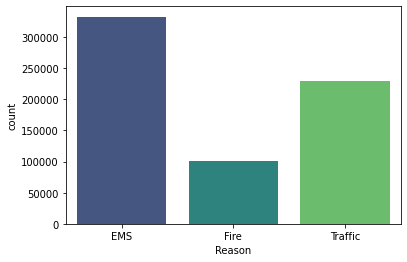

In [22]:
sns.countplot(x='Reason',data=call,palette='viridis')

### Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?

In [23]:
call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
lat          663522 non-null float64
lng          663522 non-null float64
desc         663522 non-null object
zip          583323 non-null float64
title        663522 non-null object
timeStamp    663522 non-null object
twp          663229 non-null object
addr         663522 non-null object
Reason       663522 non-null object
dtypes: float64(3), object(6)
memory usage: 45.6+ MB


In [24]:
#we can find that its time stamp is string type to further confirm we can check it by various method to confirm it
call['timeStamp'].iloc[0]

'2015-12-10 17:10:52'

In [25]:
#or by using type function
type(call['timeStamp'].iloc[0])

str

##### its clear that its a str function

### You should have seen that these timestamps are still strings. Use [pd.to datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) to convert the column from strings to DateTime objects.

In [27]:
#Simply implementing the pd.to_datetime
call['timeStamp'] = pd.to_datetime(call['timeStamp'])

In [28]:
#Using the type func from pandas
type(call['timeStamp'].iloc[0]) #its converted

pandas._libs.tslibs.timestamps.Timestamp

In [29]:
time = call['timeStamp'].iloc[0]
time.hour

17

In [30]:
time.dayofweek #you can choose from various attributes by just pressing tabkey

3

In [31]:
#lambda function helps to settle down all thing with one code only
call['Hour'] = call['timeStamp'].apply(lambda time: time.hour)

In [32]:
call['Hour']

0         17
1         17
2         14
3         16
4         16
          ..
663517    15
663518    15
663519    15
663520    15
663521    15
Name: Hour, Length: 663522, dtype: int64

In [33]:
#creating new columns with the month and dayofweek attributes
call['Month'] = call['timeStamp'].apply(lambda time: time.month)
call['Day of Week'] = call['timeStamp'].apply(lambda time: time.dayofweek)

In [34]:
#check the columns in original df
call.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,14,12,3


### Now converting the number of day of week into the days using .map()

In [36]:
dmap = {0:'Mon',1:'Tue',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [37]:
call['Day of Week'] = call['Day of Week'].map(dmap)

In [38]:
call.head(5) #successfully changes the day of week into days from no.

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,16,12,Thu


### Now use the seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.

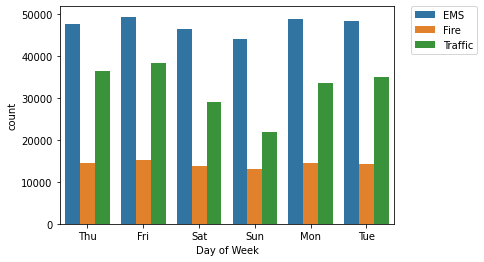

In [39]:
sns.countplot(x='Day of Week',data=call,hue='Reason')
# to relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Now do the same for Month:

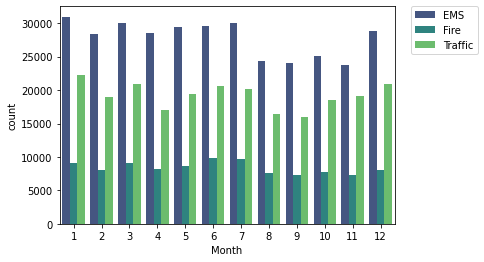

In [99]:
sns.countplot(x='Month',data=call,hue='Reason',palette='viridis')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [41]:
byMonth = call.groupby('Month').count()

In [102]:
byMonth.head(13)

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Day of Week
Month,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,52927
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,47131
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,51038
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,46069
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,48468
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,50591
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,51251
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,40375
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,40369


### There is no missing month in the Month column


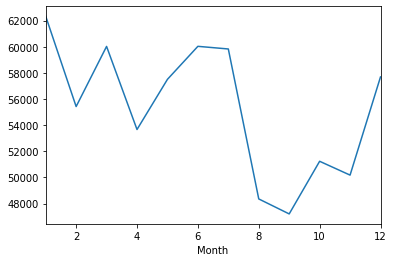

In [43]:
# now create a simple plot off of the df indication the count of calls per month
byMonth['lat'].plot()

No handles with labels found to put in legend.


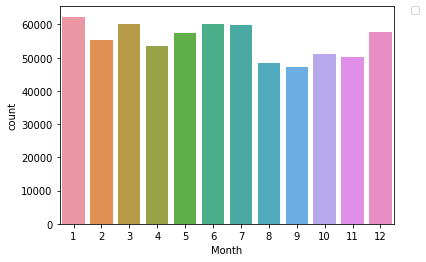

In [44]:
sns.countplot(x='Month',data=call)
# to relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you need to reset the index to a column.

In [45]:
#data=byMonth.reset_index this will allow you to create the month column from index, that helps seaborn to identify other wise it get confuse.

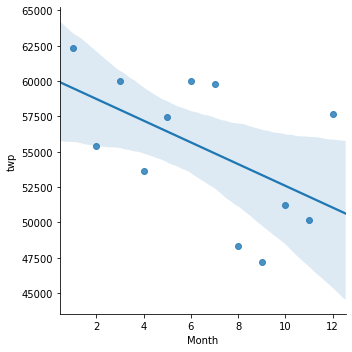

In [46]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

### Create a new column called 'Date' that contains the data from the timeStamp column. You'll need to use apply with the .date() method.

In [103]:
#df['Date'] = df['timeStamp'].apply(lambda t: t.date())

In [47]:
#e.g
t = call['timeStamp'].iloc[0]

In [48]:
t

Timestamp('2015-12-10 17:10:52')

In [49]:
t.date()

datetime.date(2015, 12, 10)

In [50]:
call['Date'] = call['timeStamp'].apply(lambda t:t.date())

In [51]:
call.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,16,12,Thu,2015-12-10


### Date coulumn is successfully driven apart from the timeStamp column

### Now groupby this Date column with count() aggregate and create a plot of counts of 911 calls

In [52]:
call.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444


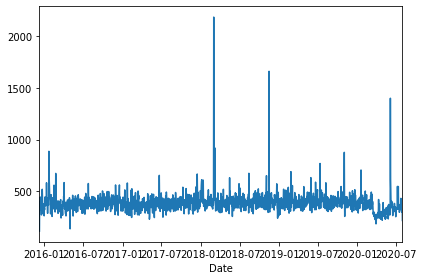

In [53]:
call.groupby('Date').count()['lat'].plot()
plt.tight_layout()

### Now create this plot but create 3 seperate plots with each plot representing a Reason for the 911 call

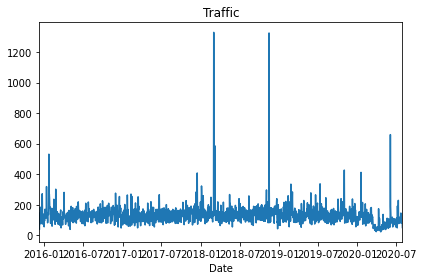

In [54]:
#using conditional selection df
call[call['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()


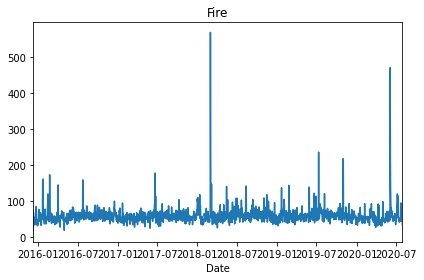

In [55]:
call[call['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

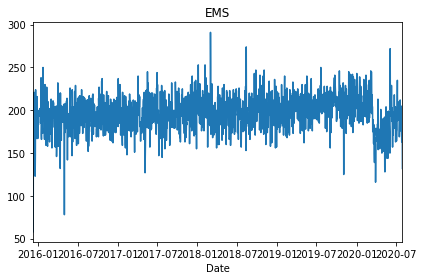

In [56]:
call[call['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

### Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack method](https://www.geeksforgeeks.org/reshape-a-pandas-dataframe-using-stackunstack-and-melt-method/).

In [61]:
dayHour = call.groupby(by=['Day of Week','Hour']).count() #it allows to create multi level index

In [62]:
dayHour = call.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack() #unstack allows you to make it in matrix form

You can also try pivit table method to do so 


### Now create heat maps

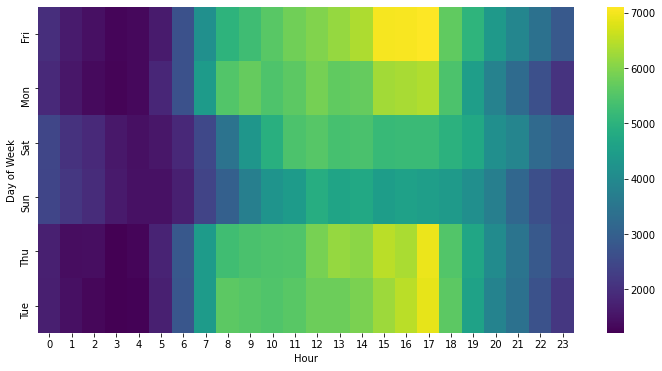

In [65]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis') 

### now we create a clustermap using df

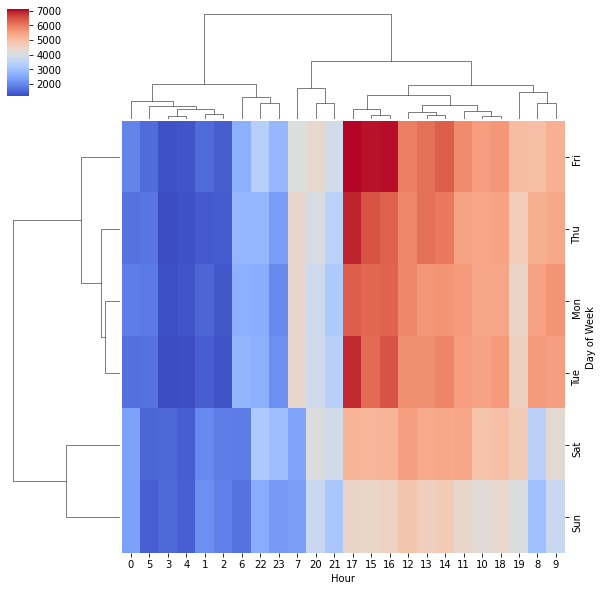

In [76]:
sns.clustermap(dayHour,cmap='coolwarm')

### Did you notice something strange about the Plot?

#### You should have noticed it was missing some days from week, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing days from week, in order to do this, we'll need to do some work with pandas...

#### Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.
The above heat maps shows the missing days from week soo to figure it out lets do the following pattern

In [77]:
#step1
byWeek = call.groupby('Day of Week').count()

In [78]:
#step2
byWeek.head() #

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Month,Date
Day of Week,,,,,,,,,,,,
Fri,102942,102942,102942,90348,102942,102942,102895,102942,102942,102942,102942,102942
Mon,96745,96745,96745,85271,96745,96745,96707,96745,96745,96745,96745,96745
Sat,89452,89452,89452,78163,89452,89452,89404,89452,89452,89452,89452,89452
Sun,78859,78859,78859,69249,78859,78859,78823,78859,78859,78859,78859,78859
Thu,98683,98683,98683,86792,98683,98683,98652,98683,98683,98683,98683,98683


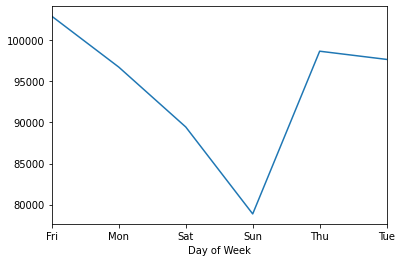

In [80]:
#we will be taking lat column as our reference 
#this makes sure that it actually call 
#and this event took place using lattitude column
byWeek['lat'].plot()

In [ ]:
#we found wednesday missing in the day of week
sns.lmplot(x='Day of Week',y='lat')

In [83]:
call

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,16,12,Thu,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,Traffic,15,7,NaN,2020-07-29
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,EMS,15,7,NaN,2020-07-29
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,EMS,15,7,NaN,2020-07-29
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,Fire,15,7,NaN,2020-07-29


In [85]:
desc = call["Day of Week"].describe()

In [86]:
print(desc)

count     564365
unique         6
top          Fri
freq      102942
Name: Day of Week, dtype: object


#### As we can see the nan value in the day of week column though we only have one missing value in our column that is wednesday 

In [87]:
call["Day of Week"].fillna("Wed", inplace = True) 

In [89]:
call

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,16,12,Thu,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,Traffic,15,7,Wed,2020-07-29
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,EMS,15,7,Wed,2020-07-29
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,EMS,15,7,Wed,2020-07-29
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,Fire,15,7,Wed,2020-07-29


In [90]:
dayMonth = call.groupby(by=['Day of Week','Month']).count()['Reason'].unstack() #unstack allows you to make it in matrix form

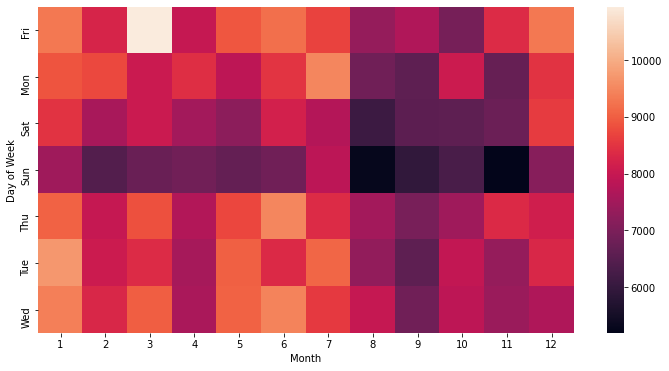

In [91]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth)

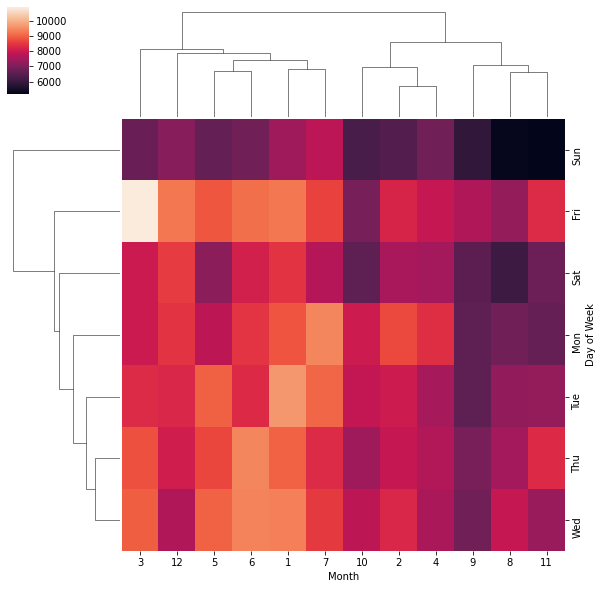

In [95]:
sns.clustermap(dayMonth)


After viewing the heat map we can visualize that there is high call rate on *Mon,Tues,Thurs* and low calling ratio on *sat* *sunday in morning*

# Done